# Lehnert Control

Experiments in: `/miniscratch/chenant/ant/sr_return/2021-02-22/11-50-00_leh/`

Today: Feb 22, 2021

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import files

In [45]:
epis_avg_in_path = '/Users/anthony/Playground/tensorboard_logs/sr_return/2021-02-22/11-50-00_leh/epis-avg_progress-filtered.csv'
epis_avg_sep = '\|'

In [46]:
episAvg_df = pd.read_csv(epis_avg_in_path, epis_avg_sep)

del episAvg_df['Unnamed: 0']

print(len(episAvg_df))
episAvg_df[0:3]

300


/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,num_episodes,envCls_name,env_kwargs,agentCls_name,seed,gamma,lamb,eta_trace,lr,reward_lr,sf_lr,policy_epsilon,use_lambda_q_control,optim,episode_idx,total_steps,cumulative_reward,value_loss_avg,sf_loss_avg,reward_loss_avg
0,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.0,0.0,0.001,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",1999.5,115.88025,0.76500,0.010102,0.0,0.000086
1,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.0,0.0,0.010,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",1999.5,51.59450,0.96550,0.012988,0.0,0.000031
2,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.0,0.0,0.100,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",1999.5,29.72125,0.99525,0.004156,0.0,0.000005


In [47]:
episAvg_df.columns

Index(['num_episodes', 'envCls_name', 'env_kwargs', 'agentCls_name', 'seed',
       'gamma', 'lamb', 'eta_trace', 'lr', 'reward_lr', 'sf_lr',
       'policy_epsilon', 'use_lambda_q_control', 'optim', 'episode_idx',
       'total_steps', 'cumulative_reward', 'value_loss_avg', 'sf_loss_avg',
       'reward_loss_avg'],
      dtype='object')

In [48]:
print(set(episAvg_df['envCls_name']))
print('env_kwargs', len(set(episAvg_df['env_kwargs'])), set(episAvg_df['env_kwargs']))
print(set(episAvg_df['agentCls_name']))
print('lamb', set(episAvg_df['lamb']))
print('eta_trace', set(episAvg_df['eta_trace']))
print('lr', set(episAvg_df['lr']))
print('reward_lr', set(episAvg_df['reward_lr']))
print('sf_lr', set(episAvg_df['sf_lr']))
print('use_lambda_q_control', set(episAvg_df['use_lambda_q_control']))
print('optim', len(set(episAvg_df['optim'])), set(episAvg_df['optim']))

{'LehnertGridWorldEnv'}
env_kwargs 1 {"{'width': 10, 'slip_prob': 0.05, 'episode_max_length': 200, 'start_switch_freq': 400, 'goal_switch_freq': 400}"}
{'LambdaSFQAgent'}
lamb {0.0, 0.5, 0.3, 0.9, 0.7, 1.0}
eta_trace {0.0}
lr {0.1, 0.3, 0.2, 0.01, 0.001}
reward_lr {'None'}
sf_lr {'None'}
use_lambda_q_control {True}
optim 1 {"{'cls_string': 'SGD', 'kwargs': None}"}


#### Print each configuration

In [49]:
grouped_df = episAvg_df.groupby(['lamb', 'lr', 'reward_lr', 'sf_lr']).mean()
grouped_df

num_episodes  seed  gamma  eta_trace  \
lamb lr    reward_lr sf_lr                                         
0.0  0.001 None      None           4000    11    0.9        0.0   
     0.010 None      None           4000    11    0.9        0.0   
     0.100 None      None           4000    11    0.9        0.0   
     0.200 None      None           4000    11    0.9        0.0   
     0.300 None      None           4000    11    0.9        0.0   
0.3  0.001 None      None           4000    11    0.9        0.0   
     0.010 None      None           4000    11    0.9        0.0   
     0.100 None      None           4000    11    0.9        0.0   
     0.200 None      None           4000    11    0.9        0.0   
     0.300 None      None           4000    11    0.9        0.0   
0.5  0.001 None      None           4000    11    0.9        0.0   
     0.010 None      None           4000    11    0.9        0.0   
     0.100 None      None           4000    11    0.9        0.0   
     0.200 None      None           4000    11    0.9        0.0   
     0.300 None      None           4000    11    0.9        0.0   
0.7  0.001 None      None           4000    11    0.9        0.0   
     0.010 None      None           4000    11    0.9        0.0   
     0.100 None      None           4000    11    0.9        0.0   
     0.200 None      None           4000    11    0.9        0.0   
     0.300 None      None           4000    11    0.9        0.0   
0.9  0.001 None      None           4000    11    0.9        0.0   
     0.010 None      None           4000    11    0.9        0.0   
     0.100 None      None           4000    11    0.9        0.0   
     0.200 None      None           4000    11    0.9        0.0   
     0.300 None      None           4000    11    0.9        0.0   
1.0  0.001 None      None           4000    11    0.9        0.0   
     0.010 None      None           4000    11    0.9        0.0   
     0.100 None      None           4000    11    0.9        0.0   
     0.200 None      None           4000    11    0.9        0.0   
     0.300 None      None           4000    11    0.9        0.0   

                            policy_epsilon  use_lambda_q_control  episode_idx  \
lamb lr    reward_lr sf_lr                                                      
0.0  0.001 None      None              0.3                  True       1999.5   
     0.010 None      None              0.3                  True       1999.5   
     0.100 None      None              0.3                  True       1999.5   
     0.200 None      None              0.3                  True       1999.5   
     0.300 None      None              0.3                  True       1999.5   
0.3  0.001 None      None              0.3                  True       1999.5   
     0.010 None      None              0.3                  True       1999.5   
     0.100 None      None              0.3                  True       1999.5   
     0.200 None      None              0.3                  True       1999.5   
     0.300 None      None              0.3                  True       1999.5   
0.5  0.001 None      None              0.3                  True       1999.5   
     0.010 None      None              0.3                  True       1999.5   
     0.100 None      None              0.3                  True       1999.5   
     0.200 None      None              0.3                  True       1999.5   
     0.300 None      None              0.3                  True       1999.5   
0.7  0.001 None      None              0.3                  True       1999.5   
     0.010 None      None              0.3                  True       1999.5   
     0.100 None      None              0.3                  True       1999.5   
     0.200 None      None              0.3                  True       1999.5   
     0.300 None      None              0.3                  True       1999.5   
0.9  0.001 None      None              0.3                  True     

## Plot best figures

#### Method to get the best hyperparameters

In [50]:
def get_averaged_best_rmse_param_df(avg_df, filters=None):
    dep_col = 'total_steps'
    indep_cols = ['agentCls_name', 'lamb', 'eta_trace', 'optim']
    search_cols = ['lr', 'reward_lr', 'sf_lr']
    
    
    # ==
    # Search for best parameters 
    df = avg_df.copy(deep=True)
    
    # Average over seeds for new df
    seedavg_df = df.groupby(indep_cols+search_cols).mean().reset_index()
    
    # Get the min dep_col from indep_col combination
    min_idxs = (seedavg_df.groupby(indep_cols)[dep_col].transform(min) 
                == seedavg_df[dep_col])
    filtering_df = seedavg_df[min_idxs]
    
    # Indeces from original df 
    idxs = (pd.merge(df, filtering_df, 
                     on=(indep_cols + search_cols), how='left', 
                     indicator=True)['_merge'] 
            == 'both')
    
    return df[idxs]

avg_best_param_df = get_averaged_best_rmse_param_df(episAvg_df)
print(len(avg_best_param_df))
avg_best_param_df[0:2]

60


,num_episodes,envCls_name,env_kwargs,agentCls_name,seed,gamma,lamb,eta_trace,lr,reward_lr,sf_lr,policy_epsilon,use_lambda_q_control,optim,episode_idx,total_steps,cumulative_reward,value_loss_avg,sf_loss_avg,reward_loss_avg
4,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.0,0.0,0.3,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",1999.5,20.16475,0.9975,0.002603,0.000000,0.000004
9,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.3,0.0,0.3,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",1999.5,21.88175,0.9995,0.002498,0.036039,0.000004


Get the best parameter for each lambda

In [51]:
avg_best_param_df.groupby(['lamb']).mean()

,num_episodes,seed,gamma,eta_trace,lr,policy_epsilon,use_lambda_q_control,episode_idx,total_steps,cumulative_reward,value_loss_avg,sf_loss_avg,reward_loss_avg
lamb,,,,,,,,,,,,,
0.0,4000,11,0.9,0.0,0.3,0.3,True,1999.5,21.756850,0.996950,0.002583,0.000000,0.000004
0.3,4000,11,0.9,0.0,0.3,0.3,True,1999.5,20.628150,0.998525,0.002538,0.036206,0.000004
0.5,4000,11,0.9,0.0,0.3,0.3,True,1999.5,19.193450,0.998875,0.002954,0.071839,0.000003
0.7,4000,11,0.9,0.0,0.3,0.3,True,1999.5,18.294425,0.997975,0.003790,0.121661,0.000003
0.9,4000,11,0.9,0.0,0.1,0.3,True,1999.5,27.377725,0.960800,0.009099,0.244559,0.000006
1.0,4000,11,0.9,0.0,0.3,0.3,True,1999.5,21.062250,0.996350,1.608160,0.280666,0.000003


#### Plot

(17.0, 27.0)

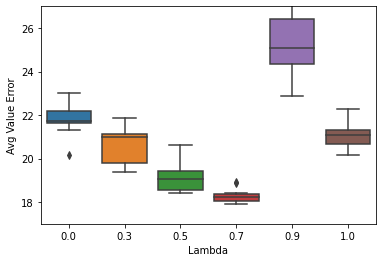

In [52]:
def script_plt_best_param_x_lamb_boxplot(best_df):
    # ==
    plt_x = 'lamb'
    plt_y = 'total_steps'
    
    filters = {
        'agentCls_name': 'LambdaSFQAgent',
        'eta_trace': 0.0,
    }
    
    df = best_df.copy(deep=True)
    for k in filters:
        df = df[df[k] == filters[k]]
    
    sns.boxplot(x=plt_x, y=plt_y, 
                 data=df)
    plt.ylabel('Avg Steps')
    plt.xlabel('Lambda')
    
    
script_plt_best_param_x_lamb_boxplot(avg_best_param_df)
plt.ylim([17, 27])

# Evaluate per-(goal) segment 

In [86]:
seg_avg_in_path = '/Users/anthony/Playground/tensorboard_logs/sr_return/2021-02-22/11-50-00_leh/segment-avg_progress.csv'
seg_avg_sep = '\|'

In [87]:
segAvg_df = pd.read_csv(seg_avg_in_path, seg_avg_sep)

del segAvg_df['Unnamed: 0']

print(len(segAvg_df))
segAvg_df[0:3]

3000


/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,num_episodes,envCls_name,env_kwargs,agentCls_name,seed,gamma,lamb,eta_trace,lr,reward_lr,...,policy_epsilon,use_lambda_q_control,optim,segment_idx,episode_idx,total_steps,cumulative_reward,value_loss_avg,sf_loss_avg,reward_loss_avg
0,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.0,0.0,0.001,None,...,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",0,199.5,132.3525,0.6350,0.009480,0.0,0.000084
1,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.0,0.0,0.001,None,...,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",1,599.5,125.7650,0.6700,0.010204,0.0,0.000092
2,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.0,0.0,0.001,None,...,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",2,999.5,113.1300,0.8475,0.009262,0.0,0.000076


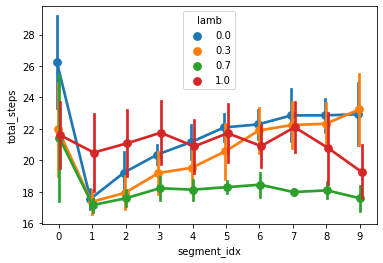

In [99]:
def script_plot_seg_performance(in_df):
    plt_x = 'segment_idx'
    plt_y = 'total_steps'
    plt_hue = 'lamb'
    plt_ci = 'sd'
    plt_n_boot = 200
    
    # # 
    filters = {
        'agentCls_name': ['LambdaSFQAgent'],
        'lamb': [0.0, 0.3, 0.7, 1.0],
        'lr': [0.3],
    }
    
    # ==
    # Copy and filter
    df = in_df.copy(deep=True)
    for k in filters:
        df = df[df[k].isin(filters[k])]
    
    # ==
    # Plot
    
    # Generate hue colors
    df[plt_hue] = [round(e, 3) for e in df[plt_hue]]
    n_hues = len(set(df[plt_hue].values))
    c_palette = sns.color_palette("tab10", n_hues) 
        
    sns.pointplot(x=plt_x, y=plt_y, 
                 hue=plt_hue,
                 ci=plt_ci, n_boot=plt_n_boot, 
                 palette=c_palette,
                  dodge=True,
                 data=df)
    #plt.ylim([10,40])

script_plot_seg_performance(segAvg_df)

## Load learning dynamics data

In [58]:
per_epis_in_path = '/Users/anthony/Playground/tensorboard_logs/sr_return/2021-02-22/11-50-00_leh/progress_filtered_hyperparams.csv'
per_epis_sep = '\|'

In [59]:
perEpis_df = pd.read_csv(per_epis_in_path, per_epis_sep)

del perEpis_df['Unnamed: 0']
del perEpis_df['DateTimeInfo']

print(len(perEpis_df))
perEpis_df[0:3]

/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


37488


,num_episodes,envCls_name,env_kwargs,agentCls_name,seed,episode_idx,total_steps,cumulative_reward,gamma,lamb,eta_trace,lr,reward_lr,sf_lr,policy_epsilon,use_lambda_q_control,optim,value_loss_avg,sf_loss_avg,reward_loss_avg
0,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0,69,1.0,0.9,0.0,0.0,0.3,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",0.014492,0.0,0.000145
1,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,1,167,1.0,0.9,0.0,0.0,0.3,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",0.003371,0.0,0.000029
2,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,2,120,1.0,0.9,0.0,0.0,0.3,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",0.003756,0.0,0.000020


In [63]:
print(set(perEpis_df['envCls_name']))
print('env_kwargs', len(set(perEpis_df['env_kwargs'])), set(perEpis_df['env_kwargs']))
print(set(perEpis_df['agentCls_name']))
print('lamb', set(perEpis_df['lamb']))
print('eta_trace', set(perEpis_df['eta_trace']))
print('lr', set(perEpis_df['lr']))
print('reward_lr', set(perEpis_df['reward_lr']))
print('sf_lr', set(perEpis_df['sf_lr']))
print('use_lambda_q_control', set(perEpis_df['use_lambda_q_control']))
print('optim', len(set(perEpis_df['optim'])), set(perEpis_df['optim']))

{'LehnertGridWorldEnv'}
env_kwargs 1 {"{'width': 10, 'slip_prob': 0.05, 'episode_max_length': 200, 'start_switch_freq': 400, 'goal_switch_freq': 400}"}
{'LambdaSFQAgent'}
lamb {0.0, 0.5, 0.3, 1.0, 0.7, 0.9}
eta_trace {0.0}
lr {0.3, 0.1}
reward_lr {'None'}
sf_lr {'None'}
use_lambda_q_control {True}
optim 1 {"{'cls_string': 'SGD', 'kwargs': None}"}


In [64]:
perEpis_df.groupby(['lamb']).mean()

,num_episodes,seed,episode_idx,total_steps,cumulative_reward,gamma,eta_trace,lr,policy_epsilon,use_lambda_q_control,value_loss_avg,sf_loss_avg,reward_loss_avg
lamb,,,,,,,,,,,,,
0.0,4000.0,12.000000,1999.500000,21.246875,0.998125,0.9,0.0,0.3,0.3,True,0.002618,0.000000,0.000004
0.3,4000.0,12.000000,1999.500000,21.426875,0.999375,0.9,0.0,0.3,0.3,True,0.002624,0.036714,0.000003
0.5,4000.0,12.000000,1999.500000,18.766750,0.999875,0.9,0.0,0.3,0.3,True,0.003209,0.073629,0.000003
0.7,4000.0,8.338192,1658.951895,18.210459,0.999271,0.9,0.0,0.3,0.3,True,0.004254,0.122602,0.000004
0.9,4000.0,4.000000,1999.500000,26.684750,0.968000,0.9,0.0,0.1,0.3,True,0.009324,0.244255,0.000006
1.0,4000.0,4.000000,1999.500000,21.032750,0.997750,0.9,0.0,0.3,0.3,True,0.073290,0.275335,0.000003


### Filter and plot

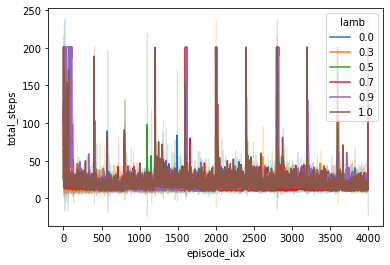

In [73]:
def script_plot_performance(in_df):
    plt_x = 'episode_idx'
    plt_y = 'total_steps'
    plt_hue = 'lamb'
    plt_ci = 'sd'
    plt_n_boot = 200
    
    # # 
    filters = {
        'agentCls_name': ['LambdaSFQAgent']
    }
    
    # ==
    # Copy and filter
    df = in_df.copy(deep=True)
    for k in filters:
        df = df[df[k].isin(filters[k])]
    
    # ==
    # Plot
    
    # Generate hue colors
    df[plt_hue] = [round(e, 3) for e in df[plt_hue]]
    n_hues = len(set(df[plt_hue].values))
    c_palette = sns.color_palette("tab10", n_hues) 
        
    sns.lineplot(x=plt_x, y=plt_y, 
                 hue=plt_hue,
                 ci=plt_ci, n_boot=plt_n_boot, 
                 palette=c_palette,
                 data=df)

script_plot_performance(perEpis_df)

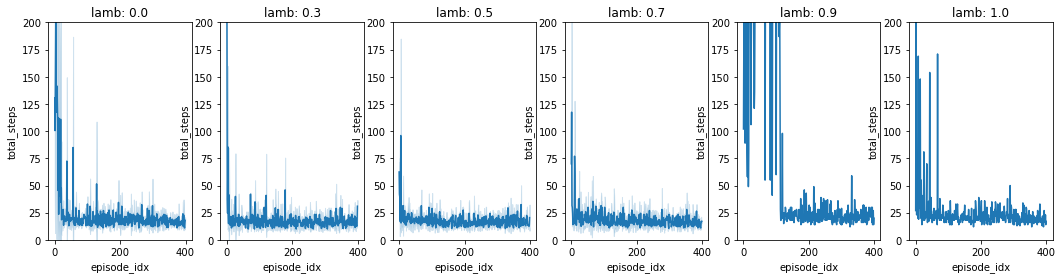

In [78]:
def script_firstGoal_subplot_performance(in_df):
    plt_x = 'episode_idx'
    plt_y = 'total_steps'
    plt_hue = None
    plt_ci = 'sd'
    plt_n_boot = 100
    
    # # 
    filters = {}
    
    # ==
    # Copy and filter
    df = in_df.copy(deep=True)
    for k in filters:
        df = df[df[k].isin(filters[k])]
        
    df = df[df['episode_idx'] < 400]
    
    # ==
    # Plot
    
    # Generate hue colors
    #df[plt_hue] = [round(e, 3) for e in df[plt_hue]]
    #n_hues = len(set(df[plt_hue].values))
    #c_palette = sns.color_palette("tab10", n_hues) 
    
    subplt_attr = 'lamb'
    
    attr_list = sorted(list(set(in_df[subplt_attr])))
    plt.figure(figsize=(18,4))
    
    for i, cur_att in enumerate(attr_list):
        cur_df = df[df[subplt_attr]==cur_att]
        plt.subplot(1, len(attr_list), i+1)
        sns.lineplot(x=plt_x, y=plt_y, 
                     hue=plt_hue,
                     ci=plt_ci, n_boot=plt_n_boot, 
                     #palette=c_palette,
                     data=cur_df)
        plt.title(f'{subplt_attr}: {cur_att}')
        plt.ylim([0, 200])

script_firstGoal_subplot_performance(perEpis_df)

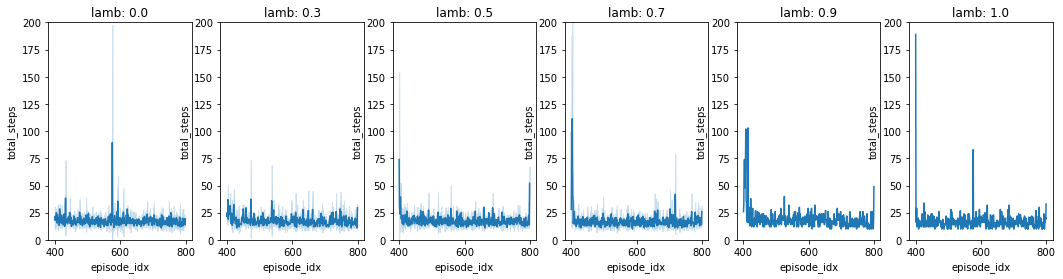

In [81]:
def script_secondGoal_subplot_performance(in_df):
    plt_x = 'episode_idx'
    plt_y = 'total_steps'
    plt_hue = None
    plt_ci = 'sd'
    plt_n_boot = 100
    
    # # 
    filters = {}
    
    # ==
    # Copy and filter
    df = in_df.copy(deep=True)
    for k in filters:
        df = df[df[k].isin(filters[k])]
        
    df = df[df['episode_idx'] >= 400]
    df = df[df['episode_idx'] < 800]
    
    # ==
    # Plot
    
    # Generate hue colors
    #df[plt_hue] = [round(e, 3) for e in df[plt_hue]]
    #n_hues = len(set(df[plt_hue].values))
    #c_palette = sns.color_palette("tab10", n_hues) 
    
    subplt_attr = 'lamb'
    
    attr_list = sorted(list(set(in_df[subplt_attr])))
    plt.figure(figsize=(18,4))
    
    for i, cur_att in enumerate(attr_list):
        cur_df = df[df[subplt_attr]==cur_att]
        plt.subplot(1, len(attr_list), i+1)
        sns.lineplot(x=plt_x, y=plt_y, 
                     hue=plt_hue,
                     ci=plt_ci, n_boot=plt_n_boot, 
                     #palette=c_palette,
                     data=cur_df)
        plt.title(f'{subplt_attr}: {cur_att}')
        plt.ylim([0, 200])

script_secondGoal_subplot_performance(perEpis_df)

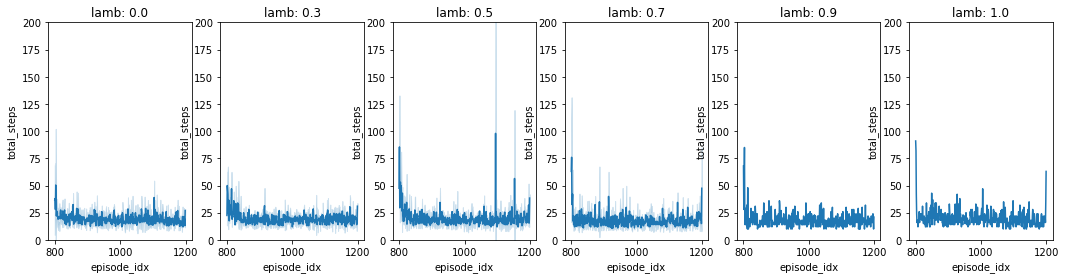

In [82]:
def script_thirdGoal_subplot_performance(in_df):
    plt_x = 'episode_idx'
    plt_y = 'total_steps'
    plt_hue = None
    plt_ci = 'sd'
    plt_n_boot = 100
    
    # # 
    filters = {}
    
    # ==
    # Copy and filter
    df = in_df.copy(deep=True)
    for k in filters:
        df = df[df[k].isin(filters[k])]
        
    df = df[df['episode_idx'] >= 800]
    df = df[df['episode_idx'] < 1200]
    
    # ==
    # Plot
    
    # Generate hue colors
    #df[plt_hue] = [round(e, 3) for e in df[plt_hue]]
    #n_hues = len(set(df[plt_hue].values))
    #c_palette = sns.color_palette("tab10", n_hues) 
    
    subplt_attr = 'lamb'
    
    attr_list = sorted(list(set(in_df[subplt_attr])))
    plt.figure(figsize=(18,4))
    
    for i, cur_att in enumerate(attr_list):
        cur_df = df[df[subplt_attr]==cur_att]
        plt.subplot(1, len(attr_list), i+1)
        sns.lineplot(x=plt_x, y=plt_y, 
                     hue=plt_hue,
                     ci=plt_ci, n_boot=plt_n_boot, 
                     #palette=c_palette,
                     data=cur_df)
        plt.title(f'{subplt_attr}: {cur_att}')
        plt.ylim([0, 200])

script_thirdGoal_subplot_performance(perEpis_df)

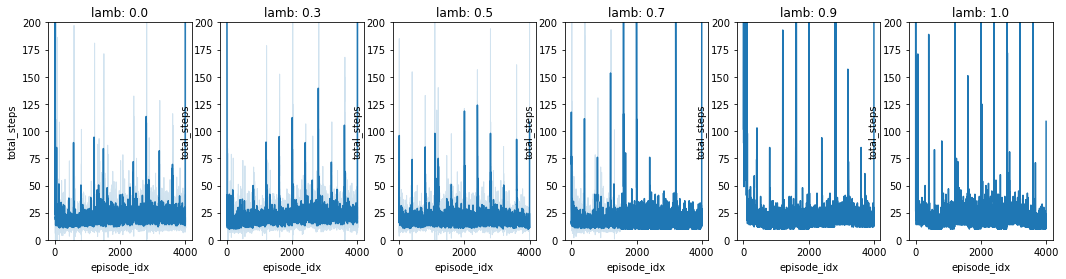

In [80]:
def script_subplot_performance(in_df):
    plt_x = 'episode_idx'
    plt_y = 'total_steps'
    plt_hue = None
    plt_ci = 'sd'
    plt_n_boot = 100
    
    # # 
    filters = {}
    
    # ==
    # Copy and filter
    df = in_df.copy(deep=True)
    for k in filters:
        df = df[df[k].isin(filters[k])]
    
    # ==
    # Plot
    
    # Generate hue colors
    #df[plt_hue] = [round(e, 3) for e in df[plt_hue]]
    #n_hues = len(set(df[plt_hue].values))
    #c_palette = sns.color_palette("tab10", n_hues) 
    
    subplt_attr = 'lamb'
    
    attr_list = sorted(list(set(in_df[subplt_attr])))
    plt.figure(figsize=(18,4))
    
    for i, cur_att in enumerate(attr_list):
        cur_df = df[df[subplt_attr]==cur_att]
        plt.subplot(1, len(attr_list), i+1)
        sns.lineplot(x=plt_x, y=plt_y, 
                     hue=plt_hue,
                     ci=plt_ci, n_boot=plt_n_boot, 
                     #palette=c_palette,
                     data=cur_df)
        plt.title(f'{subplt_attr}: {cur_att}')
        plt.ylim([0, 200])

script_subplot_performance(perEpis_df)